# Exploratory data analysis (EDA)

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Univariate NON GRAPHICAL EDA

In [2]:
dfmens1 = pd.read_csv('../backend/menstrual_cycle_data_enriched_per_DAY.csv', sep=',', encoding='utf-8')
dfmens1.head(5)

,ClientID,CycleNumber,DayofCycle,CurrentPhase,LengthofCycle,lengthCycle_cat,CycleWithPeakorNot,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalDaysofFertility,LengthofMenses,lengthMenses_cat,Age,Height,Weight,BMI
0,nfp8122,1,1,Menstruation,29,28 - 32,1.0,17,12,12,5,9,5,Normal,36.0,160.02,54.43,21.25
1,nfp8122,1,2,Menstruation,29,28 - 32,1.0,17,12,12,5,9,5,Normal,36.0,160.02,54.43,21.25
2,nfp8122,1,3,Menstruation,29,28 - 32,1.0,17,12,12,5,9,5,Normal,36.0,160.02,54.43,21.25
3,nfp8122,1,4,Menstruation,29,28 - 32,1.0,17,12,12,5,9,5,Normal,36.0,160.02,54.43,21.25
4,nfp8122,1,5,Menstruation,29,28 - 32,1.0,17,12,12,5,9,5,Normal,36.0,160.02,54.43,21.25


In [3]:
dfmens1.describe()

,CycleNumber,DayofCycle,LengthofCycle,CycleWithPeakorNot,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalDaysofFertility,LengthofMenses,Age,Height,Weight,BMI
count,48793.000000,48793.000000,48793.000000,48793.000000,48793.000000,48793.000000,48793.000000,48793.000000,48793.000000,48793.000000,48793.000000,48793.000000,48793.000000,48793.000000
mean,7.957166,15.409587,29.819175,0.910090,16.178038,13.385588,11.825405,4.307093,8.057221,5.264136,30.403664,164.471509,65.173802,24.737980
std,6.505573,8.933685,4.169155,0.286056,3.561059,2.732768,3.124775,3.554914,3.323046,1.263197,5.966794,6.176077,15.290486,4.736629
min,1.000000,1.000000,18.000000,0.000000,6.000000,1.000000,5.000000,0.000000,0.000000,2.000000,21.000000,149.860000,0.000000,16.830000
25%,3.000000,8.000000,27.000000,1.000000,14.000000,12.000000,10.000000,2.000000,6.000000,4.000000,24.000000,160.020000,54.430000,21.790000
50%,7.000000,15.000000,29.000000,1.000000,15.000000,13.000000,11.000000,3.000000,7.000000,5.000000,30.000000,162.560000,61.690000,22.460000
75%,11.000000,22.000000,32.000000,1.000000,18.000000,14.000000,13.000000,5.000000,10.000000,6.000000,36.000000,167.640000,74.840000,26.620000
max,45.000000,54.000000,54.000000,1.000000,29.000000,41.000000,26.000000,22.000000,27.000000,15.000000,43.000000,182.880000,136.080000,49.920000


In [4]:
dfmens1.quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,CycleNumber,DayofCycle,LengthofCycle,CycleWithPeakorNot,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalDaysofFertility,LengthofMenses,Age,Height,Weight,BMI
0.05,1.0,2.0,25.0,0.0,12.0,10.0,7.0,1.0,5.0,4.0,23.0,157.48,49.90,19.46
0.10,2.0,3.0,26.0,1.0,12.0,11.0,8.0,1.0,5.0,4.0,23.0,157.48,49.90,20.38
0.25,3.0,8.0,27.0,1.0,14.0,12.0,10.0,2.0,6.0,4.0,24.0,160.02,54.43,21.79
0.50,7.0,15.0,29.0,1.0,15.0,13.0,11.0,3.0,7.0,5.0,30.0,162.56,61.69,22.46
0.75,11.0,22.0,32.0,1.0,18.0,14.0,13.0,5.0,10.0,6.0,36.0,167.64,74.84,26.62
0.90,15.0,27.0,35.0,1.0,21.0,16.0,16.0,9.0,12.0,7.0,39.0,172.72,85.73,30.27
0.95,21.0,30.0,38.0,1.0,23.0,18.0,18.0,12.0,15.0,7.0,40.0,175.26,90.72,35.42


Skewness

In [5]:
dfmens1.skew()

CycleNumber                1.850743
DayofCycle                 0.215825
LengthofCycle              1.341305
CycleWithPeakorNot        -2.867312
EstimatedDayofOvulation    1.007541
LengthofLutealPhase        2.540459
FirstDayofHigh             1.119301
TotalNumberofHighDays      1.798876
TotalDaysofFertility       1.045399
LengthofMenses             0.802284
Age                        0.139599
Height                     0.444363
Weight                     0.471164
BMI                        1.441753
dtype: float64

Kurtosis

In [6]:
dfmens1.kurtosis()

CycleNumber                 4.892291
DayofCycle                 -0.774132
LengthofCycle               3.184373
CycleWithPeakorNot          6.221733
EstimatedDayofOvulation     1.261688
LengthofLutealPhase        18.771738
FirstDayofHigh              2.171094
TotalNumberofHighDays       3.857006
TotalDaysofFertility        2.518023
LengthofMenses              3.271362
Age                        -1.232374
Height                     -0.157977
Weight                      3.218939
BMI                         2.422434
dtype: float64

## Multivariate NON GRAPHICAL EDA

Correlation Matrix

In [7]:
corr = dfmens1.corr()
corr

,CycleNumber,DayofCycle,LengthofCycle,CycleWithPeakorNot,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalDaysofFertility,LengthofMenses,Age,Height,Weight,BMI
CycleNumber,1.000000,-0.024710,-0.105898,-0.039746,-0.135059,0.037935,-0.075667,-0.000192,-0.039499,-0.203016,0.101192,-0.144549,-0.100705,-0.059093
DayofCycle,-0.024710,1.000000,0.233339,-0.019530,0.151146,0.091498,0.099662,0.034147,0.039109,0.036632,-0.048346,-0.025555,-0.013505,0.004577
LengthofCycle,-0.105898,0.233339,1.000000,-0.083696,0.647753,0.392126,0.427113,0.146340,0.167607,0.156990,-0.207192,-0.109520,-0.057876,0.019615
CycleWithPeakorNot,-0.039746,-0.019530,-0.083696,1.000000,0.101786,0.033521,-0.043105,-0.390327,-0.094974,0.040824,0.026908,0.014836,0.020181,0.026761
EstimatedDayofOvulation,-0.135059,0.151146,0.647753,0.101786,1.000000,-0.269896,0.588294,0.148335,0.329627,0.201381,-0.217279,-0.124089,-0.028918,0.055038
LengthofLutealPhase,0.037935,0.091498,0.392126,0.033521,-0.269896,1.000000,-0.173410,-0.028889,-0.139383,-0.003173,-0.001593,0.029721,-0.035018,-0.027900
FirstDayofHigh,-0.075667,0.099662,0.427113,-0.043105,0.588294,-0.173410,1.000000,-0.137353,-0.156373,0.133776,-0.095267,0.003271,-0.026347,-0.004605
TotalNumberofHighDays,-0.000192,0.034147,0.146340,-0.390327,0.148335,-0.028889,-0.137353,1.000000,0.800961,0.000197,-0.038457,-0.011263,-0.060884,-0.058583
TotalDaysofFertility,-0.039499,0.039109,0.167607,-0.094974,0.329627,-0.139383,-0.156373,0.800961,1.000000,0.110084,-0.065950,-0.048239,-0.020141,0.008391
LengthofMenses,-0.203016,0.036632,0.156990,0.040824,0.201381,-0.003173,0.133776,0.000197,0.110084,1.000000,-0.158783,-0.022101,-0.057795,0.012428


Covariance Matrix

In [8]:
cov = dfmens1.cov()
cov

,CycleNumber,DayofCycle,LengthofCycle,CycleWithPeakorNot,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalDaysofFertility,LengthofMenses,Age,Height,Weight,BMI
CycleNumber,42.322481,-1.436116,-2.872232,-0.073965,-3.128872,0.674411,-1.538201,-0.004451,-0.853898,-1.668346,3.928014,-5.807830,-10.017443,-1.820911
DayofCycle,-1.436116,79.810735,8.690929,-0.049909,4.808471,2.233809,2.782142,1.084455,1.161039,0.413392,-2.577108,-1.410016,-1.844742,0.193678
LengthofCycle,-2.872232,8.690929,17.381857,-0.099817,9.616942,4.467619,5.564284,2.168911,2.322079,0.826785,-5.154215,-2.820033,-3.689483,0.387355
CycleWithPeakorNot,-0.073965,-0.049909,-0.099817,0.081828,0.103686,0.026205,-0.038530,-0.396925,-0.090281,0.014752,0.045927,0.026211,0.088269,0.036260
EstimatedDayofOvulation,-3.128872,4.808471,9.616942,0.103686,12.681144,-2.626509,6.546252,1.877814,3.900658,0.905875,-4.616774,-2.729141,-1.574612,0.928356
LengthofLutealPhase,0.674411,2.233809,4.467619,0.026205,-2.626509,7.468018,-1.480800,-0.280654,-1.265752,-0.010954,-0.025979,0.501620,-1.463226,-0.361135
FirstDayofHigh,-1.538201,2.782142,5.564284,-0.038530,6.546252,-1.480800,9.764216,-1.525760,-1.623740,0.528041,-1.776238,0.063130,-1.258821,-0.068164
TotalNumberofHighDays,-0.004451,1.084455,2.168911,-0.396925,1.877814,-0.280654,-1.525760,12.637410,9.461871,0.000885,-0.815718,-0.247283,-3.309424,-0.986435
TotalDaysofFertility,-0.853898,1.161039,2.322079,-0.090281,3.900658,-1.265752,-1.623740,9.461871,11.042635,0.462095,-1.307654,-0.990030,-1.023367,0.132082
LengthofMenses,-1.668346,0.413392,0.826785,0.014752,0.905875,-0.010954,0.528041,0.000885,0.462095,1.595668,-1.196783,-0.172422,-1.116310,0.074358


## Univariate GRAPHICAL EDA

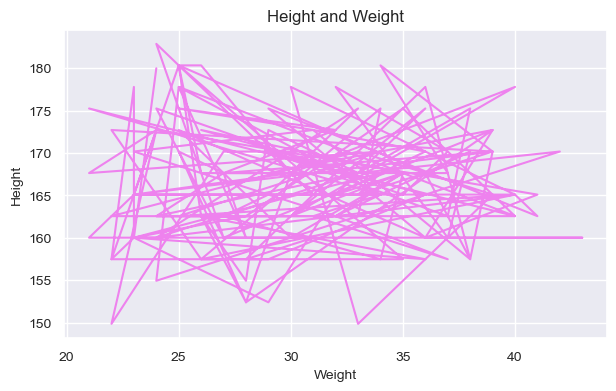

In [9]:
x = dfmens1['Age']
y = dfmens1['Height']

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="violet")
plt.title('Height and Weight', fontsize=12)
plt.xlabel('Weight', fontsize=10)
plt.ylabel('Height', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Boxplot

<Axes: xlabel='LengthofCycle'>

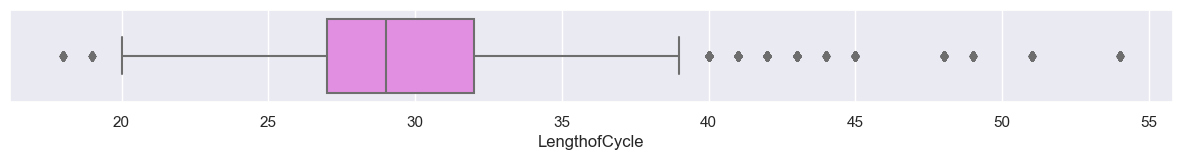

In [10]:
plt.figure(figsize=(15,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=dfmens1['LengthofCycle'], color="violet")

<Axes: xlabel='LengthofMenses'>

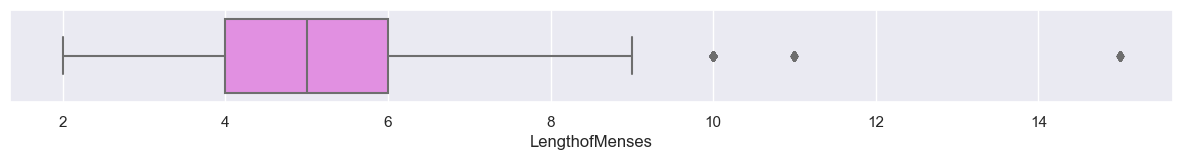

In [11]:
plt.figure(figsize=(15,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=dfmens1['LengthofMenses'], color="violet")

<Axes: xlabel='FirstDayofHigh'>

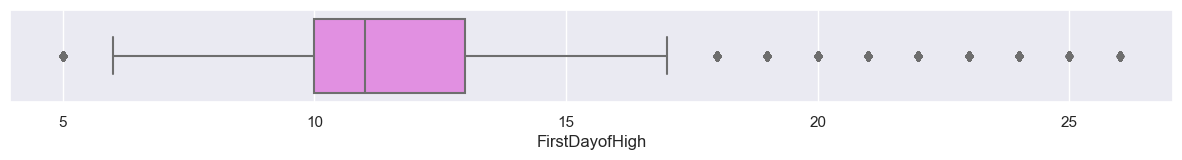

In [12]:
plt.figure(figsize=(15,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=dfmens1['FirstDayofHigh'], color="violet")

<Axes: xlabel='BMI'>

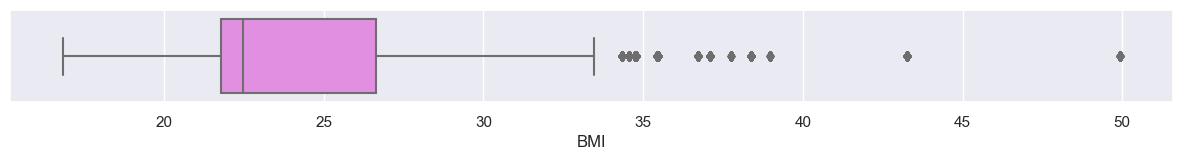

In [13]:
plt.figure(figsize=(15,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=dfmens1['BMI'], color="violet")

Histogram

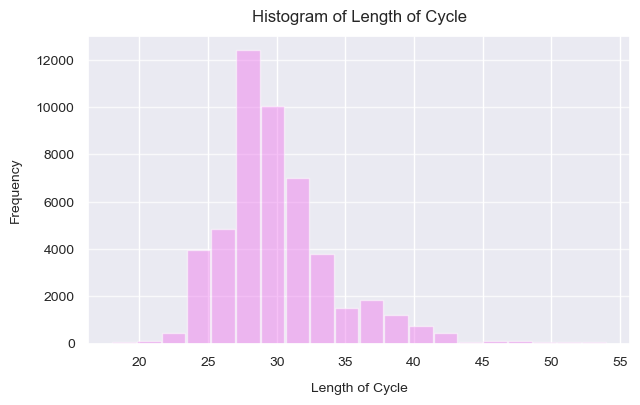

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=dfmens1['LengthofCycle'], 
                            bins=20, 
                            color='violet',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('Length of Cycle', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of Length of Cycle', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

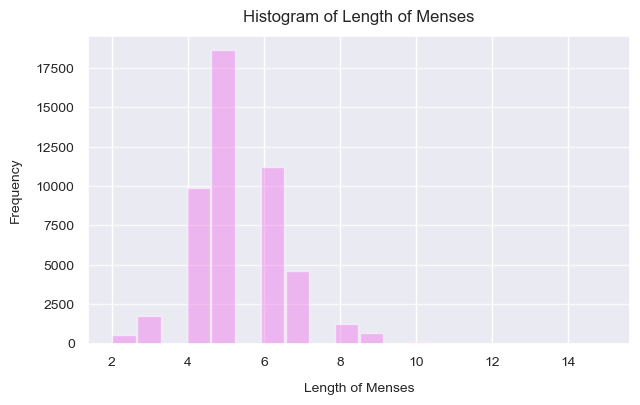

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=dfmens1['LengthofMenses'], 
                            bins=20, 
                            color='violet',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('Length of Menses', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of Length of Menses', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

Density Plot

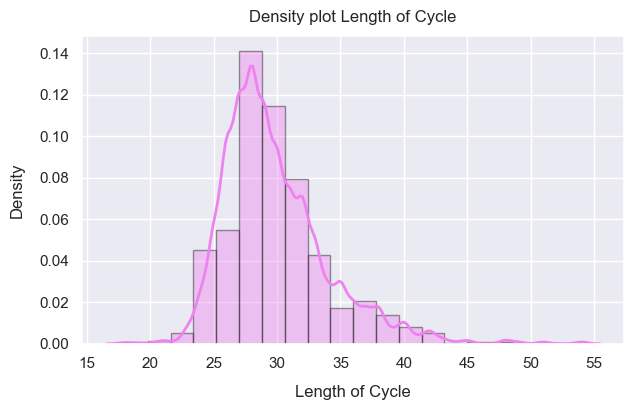

In [16]:
plt.figure(figsize=(7,4))
sns.distplot(dfmens1['LengthofCycle'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'violet',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot Length of Cycle', fontsize=12, pad=10)
plt.xlabel('Length of Cycle', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

Quantile-Quantile, aka QQ-Plot

       LengthofCycle       var
2261              18 -2.834909
42341             18 -2.834909
2250              18 -2.834909
2267              18 -2.834909
2266              18 -2.834909
...              ...       ...
18318             54  5.799934
18317             54  5.799934
18316             54  5.799934
18314             54  5.799934
18308             54  5.799934

[48793 rows x 2 columns]


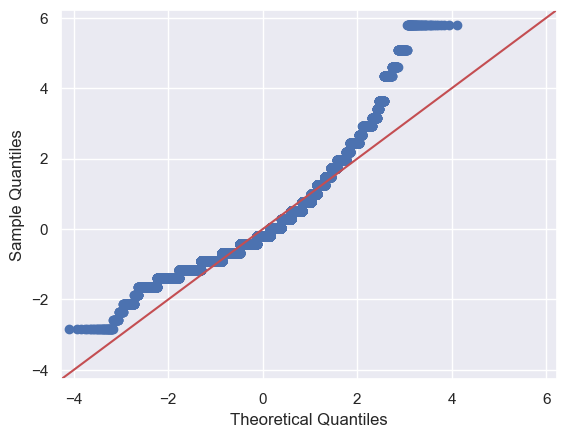

In [17]:
# Variable (standardized)
x = 'LengthofCycle'
df_qq = dfmens1
df_qq['var'] = (dfmens1[x]-dfmens1[x].mean()) / dfmens1[x].std()
print(df_qq.sort_values('var')[['LengthofCycle', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

Barchart

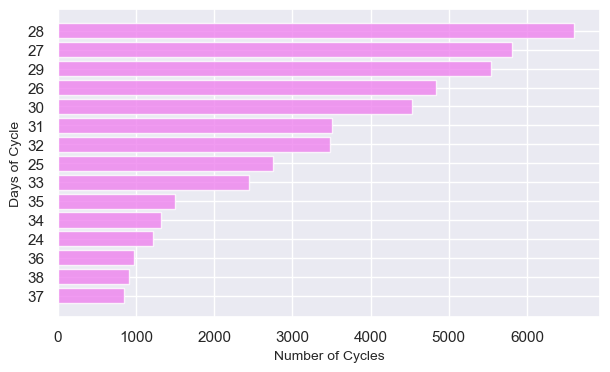

In [18]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = dfmens1['LengthofCycle'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='violet', alpha=0.8)
ax.set_yticks(y_pos, labels=index)
ax.set_xlabel('Number of Cycles', fontsize=10)
ax.set_ylabel('Days of Cycle', fontsize=10)

# Show graph
plt.show()

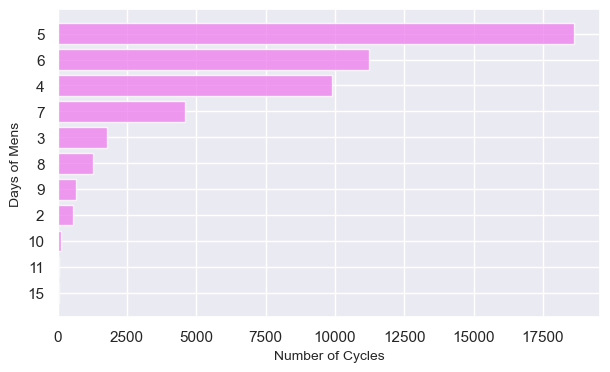

In [19]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = dfmens1['LengthofMenses'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='violet', alpha=0.8)
ax.set_yticks(y_pos, labels=index)
ax.set_xlabel('Number of Cycles', fontsize=10)
ax.set_ylabel('Days of Mens', fontsize=10)

# Show graph
plt.show()

Piechart

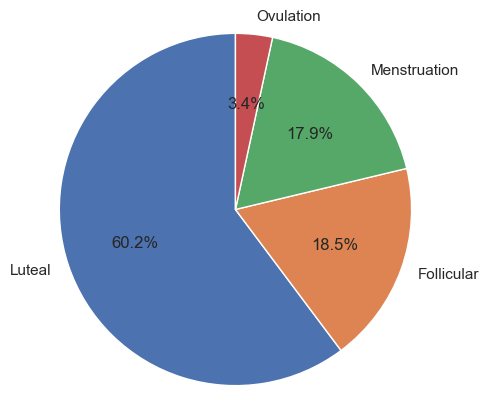

In [20]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = dfmens1.CurrentPhase.value_counts()

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

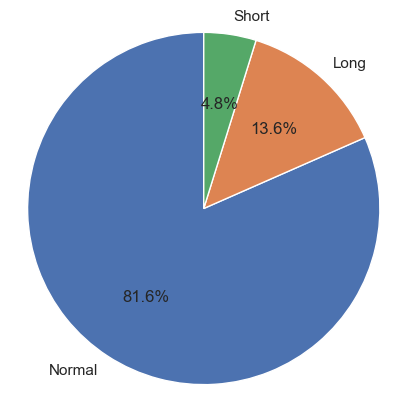

In [21]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = dfmens1.lengthMenses_cat.value_counts()

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

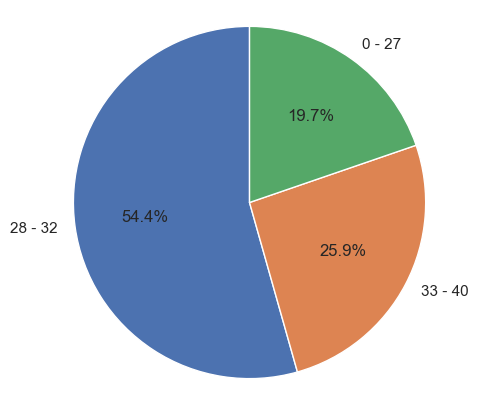

In [22]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = dfmens1.lengthCycle_cat.value_counts()

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate GRAPHICAL EDA

Scatterplot

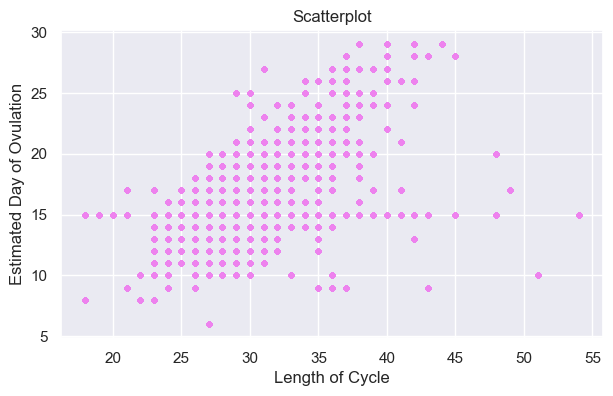

In [23]:
plt.figure(figsize=(7,4))
plt.scatter(dfmens1['LengthofCycle'], 
           dfmens1['EstimatedDayofOvulation'], 
           color="violet", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('Length of Cycle')
plt.ylabel('Estimated Day of Ovulation')
plt.show()

Scatterplot with Regression Line

(40030, 19)
0.7180415454466864
5.067958339411333


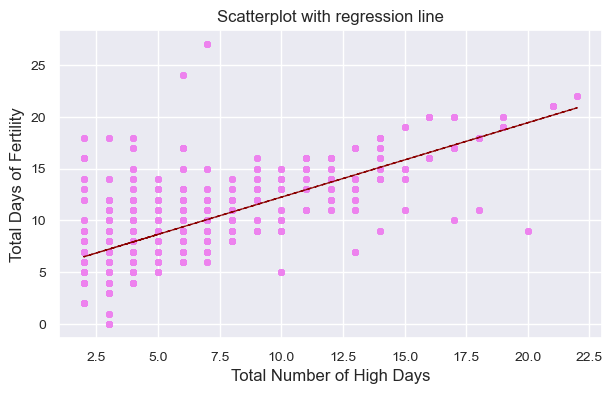

In [24]:
# Subset
df_sub = dfmens1.loc[(dfmens1.TotalNumberofHighDays >= 2)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.TotalNumberofHighDays, 
         df_sub.TotalDaysofFertility, 
         'o', 
         markersize=3.5,
         color="violet")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.TotalNumberofHighDays, df_sub.TotalDaysofFertility, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.TotalNumberofHighDays, 
         b*df_sub.TotalNumberofHighDays + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('Total Days of Fertility', fontsize=12)
plt.xlabel('Total Number of High Days', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

Scatterplot Matrix

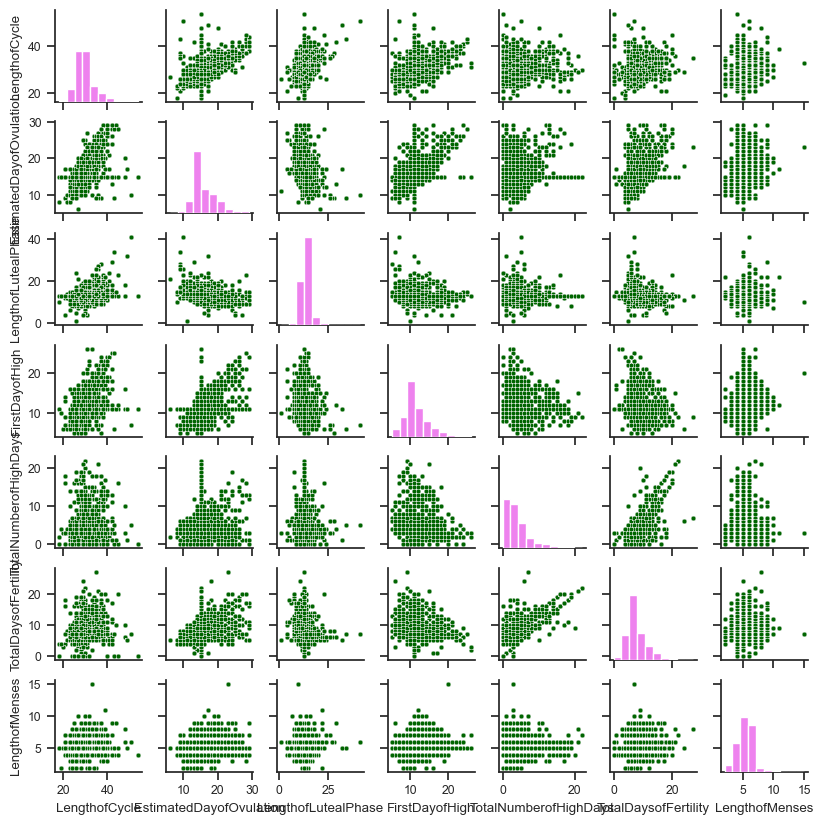

In [25]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(dfmens1[['LengthofCycle', 
         'EstimatedDayofOvulation', 
         'LengthofLutealPhase', 
         'FirstDayofHigh', 
         'TotalNumberofHighDays', 
         'TotalDaysofFertility', 
         'LengthofMenses']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='violet')

Hexagonal Binning Plot

(26177, 19)


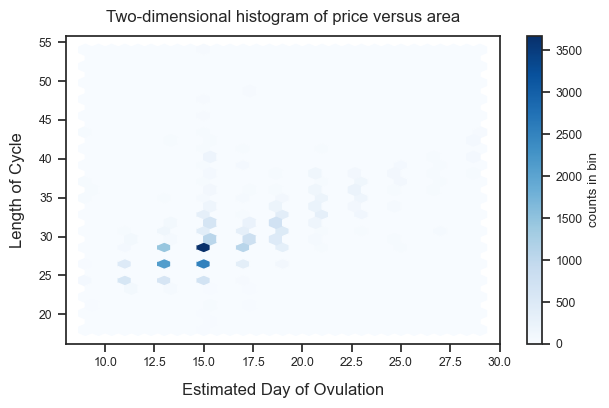

In [26]:
# Subset
df_sub = dfmens1.loc[(dfmens1.LengthofCycle >= 2) & (dfmens1.EstimatedDayofOvulation)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.EstimatedDayofOvulation, df_sub.LengthofCycle, gridsize=30, cmap='Blues')

# Set labels
plt.xlabel('Estimated Day of Ovulation', fontsize=12, labelpad=10)
plt.ylabel('Length of Cycle', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

Correlation Heatmap

<Axes: >

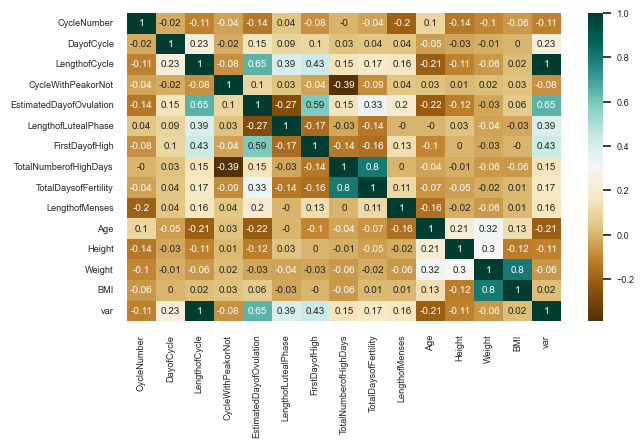

In [27]:
# Set font size for plot
sns.set(font_scale=0.6)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = dfmens1.corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

Bubble plot

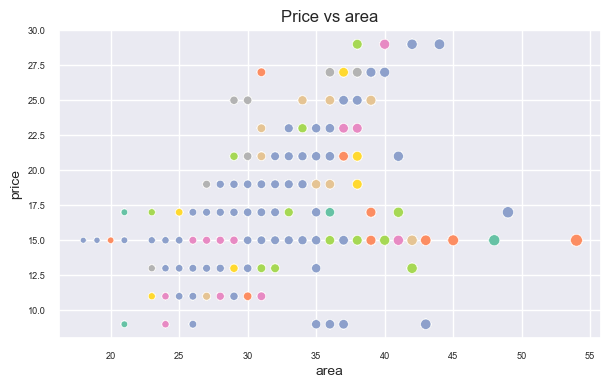

In [28]:
# Subset of df
df_sub = dfmens1.loc[(dfmens1.LengthofCycle >= 2) & (dfmens1.EstimatedDayofOvulation)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="LengthofCycle", 
                     y="EstimatedDayofOvulation",
                     size="LengthofCycle", # determines bubble size
                     hue="Age",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend